In [1]:
from attack.deid import Blur, Pixelate
from matplotlib import pyplot as plt
import cv2
from skimage import io
import plotly.express as px
import pandas as pd

In [2]:
# load csv
labels = pd.read_csv('car-plate-detection-labels.csv', index_col=0)
labels.head()

,img,xmin,xmax,ymin,ymax
filepath,,,,,
./datasets/car-plate-detection/annotations\Cars0.xml,Cars0.png,226,419,125,173
./datasets/car-plate-detection/annotations\Cars1.xml,Cars1.png,134,262,128,160
./datasets/car-plate-detection/annotations\Cars10.xml,Cars10.png,140,303,5,148
./datasets/car-plate-detection/annotations\Cars100.xml,Cars100.png,175,214,114,131
./datasets/car-plate-detection/annotations\Cars101.xml,Cars101.png,167,240,202,220


In [3]:
index = 87
row = labels.iloc[index]
bbox = (row['xmin'], row['xmax'], row['ymin'], row['ymax'])
img_path = row.name.replace('annotations\\', 'images/').replace('.xml', '.png')

In [4]:

input_img = cv2.imread(img_path)
cv2_image = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)

img = io.imread(img_path) #Read the image
fig = px.imshow(img)
fig.update_layout(width=600, height=500, margin=dict(l=10, r=10, b=10, t=10), xaxis_title='Original image with bounding box')
fig.add_shape(type='rect',x0=bbox[0], x1=bbox[1], y0=bbox[2], y1=bbox[3], xref='x', yref='y',line_color='cyan')

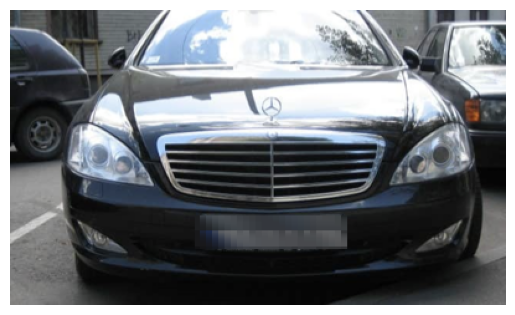

In [5]:
pixelate = Pixelate(25)
deid_img = pixelate(cv2_image.copy(), bbox)

# Display the image using matplotlib
plt.imshow(deid_img)
plt.axis('off')  # Hide axis
plt.show()

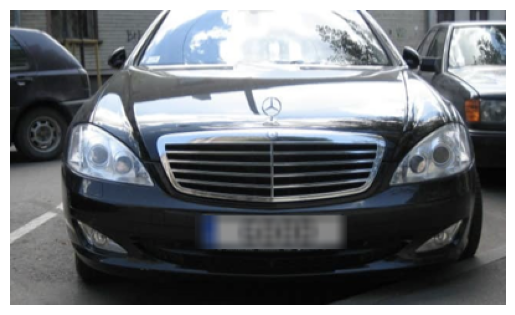

In [6]:
blur = Blur(10)
deid_img = blur(cv2_image.copy(), bbox)

# Display the image using matplotlib
plt.imshow(deid_img)
plt.axis('off')  # Hide axis
plt.show()